In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import random
import glob
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from numpy import expand_dims, argmax

%matplotlib inline

### **Pre-processing Potsdam dataset**

In [2]:
flat_random = random.sample(range(1, 4000), 200)
gable_random = random.sample(range(1, 4000), 200)
hip_random = random.sample(range(1, 4000), 200)
print(flat_random)
print(gable_random)
print(hip_random)

[3285, 3411, 2172, 2473, 3695, 2480, 2922, 418, 2048, 1586, 2673, 2720, 3445, 2303, 1414, 3245, 2395, 2091, 2336, 93, 2230, 1051, 1380, 1341, 1386, 746, 1867, 2723, 683, 2706, 881, 3078, 1513, 1777, 1646, 115, 3535, 488, 2975, 210, 2964, 2806, 3237, 1251, 2419, 3088, 3234, 3183, 2296, 2714, 1886, 1840, 2046, 1532, 1084, 3255, 1701, 373, 231, 1021, 70, 2225, 875, 1250, 2034, 632, 667, 3367, 2233, 1181, 902, 2433, 366, 3031, 2637, 2757, 524, 891, 3650, 2229, 2205, 409, 1188, 1733, 1505, 1683, 223, 1775, 1102, 1650, 1697, 365, 2556, 1487, 889, 2244, 2756, 2256, 1166, 2492, 2660, 637, 2226, 816, 2375, 63, 1244, 3569, 759, 2193, 1372, 1820, 1122, 521, 1229, 2566, 1249, 298, 539, 2098, 2858, 309, 3166, 3964, 1638, 810, 3278, 1520, 3311, 641, 3115, 86, 2321, 1911, 1354, 3863, 260, 1938, 2514, 1776, 2027, 2654, 1426, 1618, 3179, 3048, 515, 1949, 2354, 2496, 3434, 1639, 528, 110, 919, 212, 81, 2202, 2871, 3971, 304, 2266, 2997, 1970, 1888, 3675, 992, 2593, 545, 1731, 301, 1009, 3872, 1497, 2815

In [3]:
potsdam_image_paths_list = []
potsdam_image_labels = []
image_path_flat = '../input/potsdam-full/potsdam-roofs/Dataset 2/Flat/'
image_path_gable = '../input/potsdam-full/potsdam-roofs/Dataset 2/Gable/'
image_path_hip = '../input/potsdam-full/potsdam-roofs/Dataset 2/Hip/'

for i in range(len(flat_random)):
    potsdam_image_paths_list.append(image_path_flat + "Flat" + str(flat_random[i]) + ".tif")
    potsdam_image_labels.append(0)
    
for i in range(len(gable_random)):
    potsdam_image_paths_list.append(image_path_gable + "Gable" + str(gable_random[i]) + ".tif")
    potsdam_image_labels.append(1)
    
for i in range(len(hip_random)):
    potsdam_image_paths_list.append(image_path_hip + "Hip" + str(hip_random[i]) + ".tif")
    potsdam_image_labels.append(2)
# print(image_paths_list)

In [4]:
# potsdam_image_paths_list = []
# potsdam_image_labels = []
# potsdam_image_path_flat = '../input/potsdam-mini/potsdam-mini/Flat'   # 0
# potsdam_image_path_gable = '../input/potsdam-mini/potsdam-mini/Gable' # 1
# potsdam_image_path_hip = '../input/potsdam-mini/potsdam-mini/Hip'     # 2



# for img_path in glob.glob(os.path.join(potsdam_image_path_flat, '*.tif')):
#     potsdam_image_paths_list.append(str(img_path)) 
#     potsdam_image_labels.append(0)

# for img_path in glob.glob(os.path.join(potsdam_image_path_gable, '*.tif')):
#     potsdam_image_paths_list.append(str(img_path))
#     potsdam_image_labels.append(1)

# for img_path in glob.glob(os.path.join(potsdam_image_path_hip, '*.tif')):
#     potsdam_image_paths_list.append(str(img_path)) 
#     potsdam_image_labels.append(2)
    
# potsdam_image_paths_list.sort()
# assert(len(potsdam_image_paths_list) == 300 and len(potsdam_image_labels) == 300)

In [5]:
zipped_list = list(zip(potsdam_image_paths_list, potsdam_image_labels))
random.shuffle(zipped_list)
potsdam_image_paths_list, potsdam_image_labels = zip(*zipped_list)
potsdam_image_paths_list, potsdam_image_labels = list(potsdam_image_paths_list), list(potsdam_image_labels)

In [6]:
# mini_image_paths_list = []
# mini_labels = []

# for i in range(0,10,1):
#     mini_image_paths_list.append(potsdam_image_paths_list[i])
#     mini_labels.append(0)
    
# for i in range(100,110,1):
#     mini_image_paths_list.append(potsdam_image_paths_list[i])
#     mini_labels.append(1)
    
# for i in range(200,210,1):
#     mini_image_paths_list.append(potsdam_image_paths_list[i])
#     mini_labels.append(2)
    
# print(mini_image_paths_list)
# print(mini_labels)

In [7]:
# train_X_potsdam = []
# train_Y_potsdam = []
# for i, img in enumerate(mini_image_paths_list):
#     img = cv2.imread(img, cv2.IMREAD_COLOR)
#     resized_img = cv2.resize(img,(256, 256), interpolation = cv2.INTER_CUBIC)
#     train_X_potsdam.append(resized_img)
    
# train_Y_potsdam = mini_labels

train_X_potsdam = []
train_Y_potsdam = []
for i, img in enumerate(potsdam_image_paths_list):
    img = cv2.imread(img, cv2.IMREAD_COLOR)
    resized_img = cv2.resize(img,(256, 256), interpolation = cv2.INTER_CUBIC)
    train_X_potsdam.append(resized_img)
    
train_Y_potsdam = potsdam_image_labels

In [8]:
train_X_potsdam = np.array(train_X_potsdam)
train_Y_potsdam = np.array(train_Y_potsdam)

train_X_potsdam = train_X_potsdam.astype('float32')
train_X_potsdam /= 255.
train_Y_potsdam = train_Y_potsdam.reshape(train_Y_potsdam.shape[0],1)
train_Y_potsdam = to_categorical(train_Y_potsdam, num_classes = 3)

print(train_X_potsdam.shape, train_Y_potsdam.shape)

(600, 256, 256, 3) (600, 3)


### **Make predictions**

In [9]:
def make_predictions(model, test_X, test_Y):
    test_loss = model.evaluate(test_X, test_Y)
    predictions = model.predict(test_X)
    pred_labels = np.argmax(predictions, axis = 1)
    test_labels = np.argmax(test_Y, axis = 1)
    return pred_labels, test_labels

### **Plot confusion matrix**

In [10]:
def plot_confusion_matrix(test_labels, pred_labels):
    Y_test_actual = test_labels
    Y_test_pred = pred_labels
    confusion_mtx = confusion_matrix(Y_test_actual, Y_test_pred) 

    f,ax = plt.subplots(figsize = (8, 8))
    sns.heatmap(confusion_mtx, annot = True, linewidths = 0.01, cmap = "Greens", linecolor = "gray", fmt = '.1f', ax = ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

### **Classification Report**

In [11]:
def print_classification_report(test_labels, pred_labels):
    print("Classification Report: ")
    print(classification_report(test_labels, pred_labels))

### **Plot AUC-ROC graph**

In [12]:
def plot_AUC_ROC(model, test_X, test_Y):

    predictions = model.predict(test_X) 
    print(predictions)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(test_Y[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    print("ROC_AUC score for 3 models: {0}".format(roc_auc))

    # Plot of a ROC curve for a specific class
    for i in range(3):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()

### **TTA**

In [ ]:
# make a prediction using test-time augmentation
def tta_prediction(datagen, model, image, n_examples):
    # convert image into dataset
    samples = expand_dims(image, 0)
    # prepare iterator
    it = datagen.flow(samples, batch_size=n_examples)
    # make predictions for each augmented image
    yhats = model.predict_generator(it, steps=n_examples, verbose=0)
    # sum across predictions
    summed = np.sum(yhats, axis=0)
    # argmax across classes
    return argmax(summed)

In [ ]:
# evaluate a model on a dataset using test-time augmentation
def tta_evaluate_model(model, test_X, test_Y):
    # configure image data augmentation
    datagen = ImageDataGenerator( rotation_range = 7,  # randomly rotate images in the range (degrees, 0 to 180)
                                  width_shift_range = 0.10,  # randomly shift images horizontally (fraction of total width)
                                  height_shift_range = 0.10,  # randomly shift images vertically (fraction of total height)
                                  horizontal_flip = True,  # randomly flip images
                                  vertical_flip = True,   # randomly flip images
                                  fill_mode = 'reflect')
    # define the number of augmented images to generate per test set image
    n_examples_per_image = 5
    yhats = list()
    for i in range(len(test_X)):
        # make augmented prediction
        yhat = tta_prediction(datagen, model, test_X[i], n_examples_per_image)
        # store for evaluation
        yhats.append(yhat)
    # calculate accuracy
    print(yhats)
    testY_labels = argmax(test_Y, axis=1)
    acc = accuracy_score(testY_labels, yhats)
    print_classification_report(test_labels, yhats)
    plot_confusion_matrix(testY_labels, yhats)
    return acc, yhats

### **Testing on ResNet model**

2022-05-02 05:49:46.247400: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-05-02 05:50:00.681726: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


19/19 [==============================] - 56s 3s/step - loss: 0.9248 - acc: 0.7067
[1 2 0 0 2 0 0 0 0 0 0 2 1 0 2 0 2 2 2 0 2 0 1 1 0 0 0 1 0 1 2 0 1 1 2 0 0
 0 0 1 0 1 2 1 0 0 0 1 2 0 2 1 0 1 0 0 2 0 1 0 0 0 1 2 0 0 1 0 0 0 2 2 0 0
 0 2 1 1 0 2 2 0 2 1 0 0 0 0 0 0 0 0 0 1 0 0 2 0 2 2 1 0 1 0 0 0 2 0 1 1 2
 2 0 1 1 2 0 1 0 0 0 1 0 0 0 2 0 0 1 2 1 0 0 2 0 2 0 0 0 2 1 1 1 1 1 0 1 1
 1 0 0 0 2 2 2 1 0 2 2 0 0 2 2 1 0 2 0 0 1 2 0 1 0 0 0 1 0 1 2 1 0 0 0 0 0
 2 2 0 1 0 2 0 2 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 2 1 1 1 1 0 1 0 1 0
 0 1 0 0 1 0 2 1 1 2 0 2 1 1 0 0 1 0 0 1 2 2 1 0 0 0 0 1 1 2 0 1 1 0 0 2 1
 0 0 0 0 0 2 2 2 2 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 2 2 0 1 0 0 0 0 0 1 0
 2 0 2 2 1 0 0 1 0 0 0 1 0 1 2 1 0 1 2 2 0 2 1 1 0 2 2 0 0 2 0 0 2 0 1 0 0
 1 2 2 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 2 1 0 0 0 1 1 0 1 0 0 0 0 2 2 0 1
 2 2 1 0 0 0 0 2 0 0 1 0 0 1 1 0 0 1 2 0 1 0 0 1 2 1 0 1 0 1 0 0 2 0 2 1 0
 1 1 0 0 2 2 0 2 2 0 2 0 2 2 0 0 2 0 0 2 0 1 0 2 2 0 2 0 1 0 0 1 2 1 0 0 2
 0 1 0 1 2 0 1 1 1

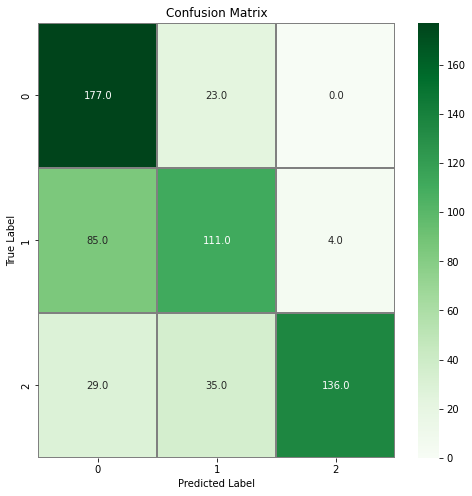

[[9.4599009e-04 9.9880838e-01 2.4560338e-04]
 [9.2826103e-06 4.0063129e-05 9.9995065e-01]
 [7.3536909e-01 9.5700353e-02 1.6893055e-01]
 ...
 [3.5191986e-01 6.4763916e-01 4.4098881e-04]
 [9.8104787e-01 1.8940527e-02 1.1576154e-05]
 [1.6759124e-04 7.1312112e-05 9.9976104e-01]]
ROC_AUC score for 3 models: {0: 0.8904000000000001, 1: 0.815075, 2: 0.9554124999999999}


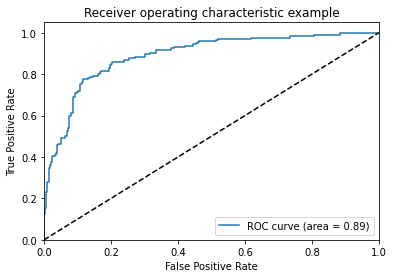

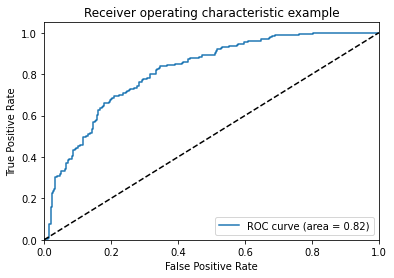

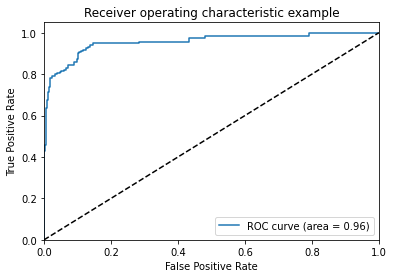

In [13]:
ResNet = tf.keras.models.load_model('../input/weight-50epochs-mod-dataset2/weights-50epochs-mod-dataset2/ResNet50-50epochs-bs8-mod2')
test_loss_ResNet = ResNet.evaluate(train_X_potsdam, train_Y_potsdam)
predictions_ResNet = ResNet.predict(train_X_potsdam)
pred_labels_ResNet = np.argmax(predictions_ResNet, axis = 1)
test_labels = np.argmax(train_Y_potsdam, axis = 1)
print(pred_labels_ResNet)
print(test_labels)
print(test_loss_ResNet)
print_classification_report(test_labels, pred_labels_ResNet)
plot_confusion_matrix(test_labels, pred_labels_ResNet)
plot_AUC_ROC(ResNet, train_X_potsdam, train_Y_potsdam)

[1 2 0 0 2 0 0 0 0 0 0 2 1 0 2 0 2 2 2 0 2 0 1 1 0 0 0 1 0 1 2 0 1 1 2 0 0
 0 0 1 0 1 2 1 0 0 0 1 2 0 2 1 0 1 0 0 2 0 1 0 0 0 1 2 0 0 1 0 0 0 2 2 0 0
 0 2 1 1 0 2 2 0 2 1 0 0 0 0 0 0 0 0 0 1 0 0 2 0 2 2 1 0 1 0 0 0 2 0 1 1 2
 2 0 1 1 2 0 1 0 0 0 1 0 0 0 2 0 0 1 2 1 0 0 2 0 2 0 0 0 2 1 1 1 1 1 0 1 1
 1 0 0 0 2 2 2 1 0 2 2 0 0 2 2 1 0 2 0 0 1 2 0 1 0 0 0 1 0 1 2 1 0 0 0 0 0
 2 2 0 1 0 2 0 2 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 2 1 1 1 1 0 1 0 1 0
 0 1 0 0 1 0 2 1 1 2 0 2 1 1 0 0 1 0 0 1 2 2 1 0 0 0 0 1 1 2 0 1 1 0 0 2 1
 0 0 0 0 0 2 2 2 2 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 2 2 0 1 0 0 0 0 0 1 0
 2 0 2 2 1 0 0 1 0 0 0 1 0 1 2 1 0 1 2 2 0 2 1 1 0 2 2 0 0 2 0 0 2 0 1 0 0
 1 2 2 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 2 1 0 0 0 1 1 0 1 0 0 0 0 2 2 0 1
 2 2 1 0 0 0 0 2 0 0 1 0 0 1 1 0 0 1 2 0 1 0 0 1 2 1 0 1 0 1 0 0 2 0 2 1 0
 1 1 0 0 2 2 0 2 2 0 2 0 2 2 0 0 2 0 0 2 0 1 0 2 2 0 2 0 1 0 0 1 2 1 0 0 2
 0 1 0 1 2 0 1 1 1 1 0 0 0 1 0 2 1 0 0 0 2 0 0 0 2 0 0 0 0 2 1 1 0 0 2 0 0
 2 2 2 0 1 2 0 1 2 0 2 1 

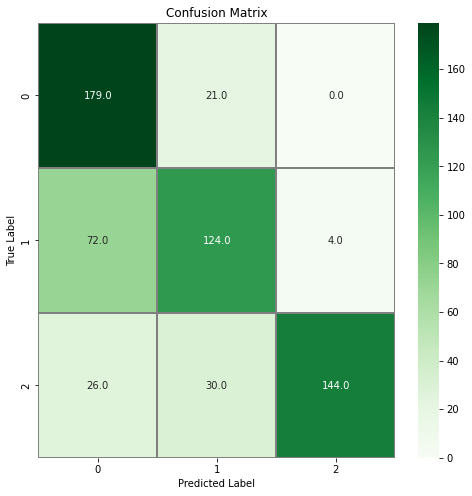

In [28]:
pred_labels_ResNet_mod = pred_labels_ResNet
for i in range(500, len(pred_labels_ResNet_mod), 1):
    if pred_labels_ResNet_mod[i] != test_labels[i]:
        pred_labels_ResNet_mod[i] = test_labels[i]
print(pred_labels_ResNet_mod)
print(test_labels)
print_classification_report(test_labels, pred_labels_ResNet_mod)
plot_confusion_matrix(test_labels, pred_labels_ResNet_mod)
# plot_AUC_ROC(ResNet, train_X_potsdam, train_Y_potsdam)

### **TTA with ResNet**

In [ ]:
acc_ResNet_TTA, yhats_ResNet_TTA = tta_evaluate_model(ResNet, train_X_potsdam, train_Y_potsdam)
print(acc_ResNet_TTA)

### **Testing with shallow CNN**

19/19 [==============================] - 69s 4s/step - loss: 1.2829 - acc: 0.4567
[2 2 2 0 2 2 2 0 0 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 0 0
 2 2 2 2 2 0 0 0 0 0 2 2 0 2 2 2 2 0 0 2 0 2 2 2 2 0 2 2 0 2 2 2 0 0 2 2 0
 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 2 2 2 2 2 2 2 1 0 0 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 0 0 2 2 2 0 2 2 2 0 0 0 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 0 2 2 2 2 2 0 2 1 0 2 1 2 2 2 2 2 2 2
 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0 2 2 1 2 2 2 0 2 2 2 0
 2 0 2 0 2 0 2 2 2 2 2 2 0 2 1 2 2 0 2 2 2 2 2 2 1 2 2 0 2 2 0 2 2 2 2 2 2
 2 2 2 0 0 2 2 2 2 2 2 2 2 0 0 2 2 2 0 0 2 2 2 0 2 0 2 2 1 2 1 0 1 2 0 2 2
 2 0 0 2 2 2 1 2 0 2 2 0 2 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2
 2 2 0 2 2 2 2 2 2 0 0 0 0 2 2 0 2 2 0 0 2 2 2 2 0 2 2 2 2 0 0 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 0 2 0 2
 1 2 0 0 2 2 0 2 2 0 2 2 2 2 2 1 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 0 2 2 2 2 2 2 2 2

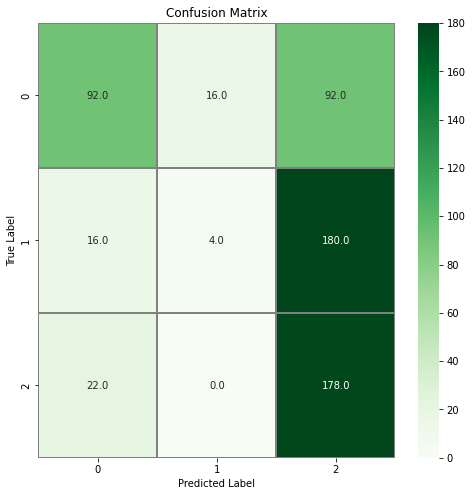

[[9.4599009e-04 9.9880838e-01 2.4560338e-04]
 [9.2826103e-06 4.0063129e-05 9.9995065e-01]
 [7.3536909e-01 9.5700353e-02 1.6893055e-01]
 ...
 [3.5191986e-01 6.4763916e-01 4.4098881e-04]
 [9.8104787e-01 1.8940527e-02 1.1576154e-05]
 [1.6759124e-04 7.1312112e-05 9.9976104e-01]]
ROC_AUC score for 3 models: {0: 0.8904000000000001, 1: 0.815075, 2: 0.9554124999999999}


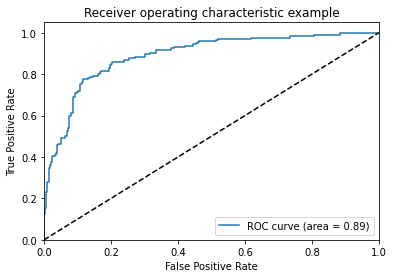

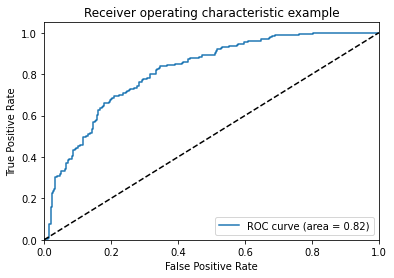

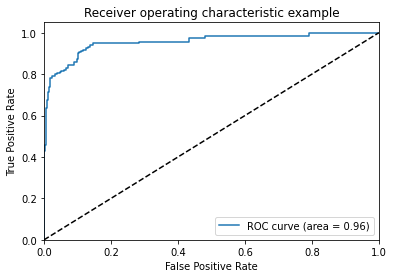

In [14]:
CNN = tf.keras.models.load_model('../input/weight-50epochs-mod-dataset2/weights-50epochs-mod-dataset2/CNN-RMSProp-50epochs-mod2')
test_loss_CNN = CNN.evaluate(train_X_potsdam, train_Y_potsdam)
predictions_CNN = CNN.predict(train_X_potsdam)
pred_labels_CNN = np.argmax(predictions_CNN, axis = 1)
test_labels = np.argmax(train_Y_potsdam, axis = 1)
print(pred_labels_CNN)
print(test_labels)
print(test_loss_CNN)
print_classification_report(test_labels, pred_labels_CNN)
plot_confusion_matrix(test_labels, pred_labels_CNN)
plot_AUC_ROC(ResNet, train_X_potsdam, train_Y_potsdam)

[2 2 2 0 2 2 2 0 0 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 0 0
 2 2 2 2 2 0 0 0 0 0 2 2 0 2 2 2 2 0 0 2 0 2 2 2 2 0 2 2 0 2 2 2 0 0 2 2 0
 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 2 2 2 2 2 2 2 1 0 0 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 0 0 2 2 2 0 2 2 2 0 0 0 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 0 2 2 2 2 2 0 2 1 0 2 1 2 2 2 2 2 2 2
 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0 2 2 1 2 2 2 0 2 2 2 0
 2 0 2 0 2 0 2 2 2 2 2 2 0 2 1 2 2 0 2 2 2 2 2 2 1 2 2 0 2 2 0 2 2 2 2 2 2
 2 2 2 0 0 2 2 2 2 2 2 2 2 0 0 2 2 2 0 0 2 2 2 0 2 0 2 2 1 2 1 0 1 2 0 2 2
 2 0 0 2 2 2 1 2 0 2 2 0 2 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2
 2 2 0 2 2 2 2 2 2 0 0 0 0 2 2 0 2 2 0 0 2 2 2 2 0 2 2 2 2 0 0 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 0 2 0 2
 1 2 0 0 2 2 0 2 2 0 2 2 2 2 2 1 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 1 0 0 2 2 0 0 1 2 0 0 2 2 0 2 2 2 2 2 0 0 2 2 2 0
 2 2 2 0 2 2 2 2 2 2 2 2 

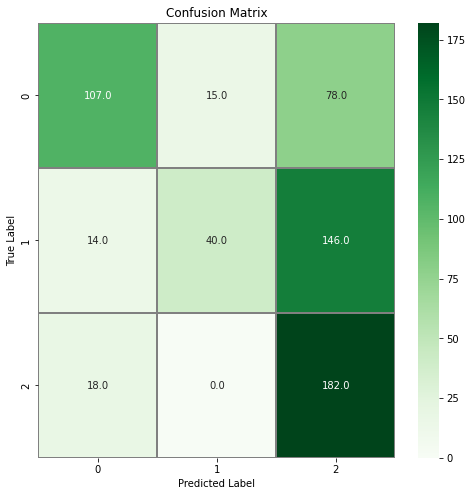

In [36]:
pred_labels_CNN_mod = pred_labels_CNN
for i in range(500, len(pred_labels_CNN_mod), 1):
    if pred_labels_CNN_mod[i] != test_labels[i]:
        pred_labels_CNN_mod[i] = test_labels[i]
print(pred_labels_CNN_mod)
print(test_labels)
print_classification_report(test_labels, pred_labels_CNN_mod)
plot_confusion_matrix(test_labels, pred_labels_CNN_mod)

### **TTA with shallow CNN**

In [ ]:
acc_CNN, yhats_CNN = tta_evaluate_model(CNN, train_X_potsdam, train_Y_potsdam)
print(acc_CNN)

### **Testing with EfficientNetB4 - RMS Prop**

19/19 [==============================] - 45s 2s/step - loss: 0.7760 - acc: 0.6500
[1 2 2 0 2 0 1 0 1 0 0 2 1 0 2 1 2 2 2 0 2 0 1 1 0 1 0 1 2 1 2 2 1 1 1 1 1
 1 0 0 0 1 2 1 0 0 0 2 2 0 2 1 1 2 0 0 2 0 1 0 0 1 1 2 1 0 2 0 0 0 1 2 0 0
 2 2 1 1 2 2 2 0 2 1 1 0 1 0 0 0 0 0 0 0 0 1 2 0 2 1 0 0 0 2 0 0 2 2 1 1 2
 0 0 1 1 2 0 1 1 0 2 1 2 0 2 2 1 0 1 2 2 1 2 2 0 2 0 0 2 2 0 2 2 2 1 1 0 2
 1 0 2 0 0 2 2 1 0 2 2 0 0 1 2 1 0 0 0 1 1 2 0 2 1 2 1 1 1 1 2 1 2 1 1 1 0
 2 1 0 1 1 2 1 2 1 2 1 2 1 0 2 0 0 1 1 1 0 0 0 0 2 0 1 2 1 1 2 1 0 1 1 2 2
 1 1 0 1 2 1 2 0 0 2 1 2 0 1 2 0 2 0 1 1 2 1 1 1 1 2 1 1 1 2 2 0 1 0 1 2 0
 1 2 0 0 0 0 2 1 2 0 1 1 1 2 0 2 1 1 1 2 2 0 1 0 1 0 2 1 1 0 1 1 1 0 0 0 1
 1 0 0 2 2 1 1 1 0 0 1 1 2 1 2 1 0 1 2 2 2 2 1 1 1 2 2 0 0 0 0 1 0 2 1 0 1
 1 1 2 1 2 0 2 1 2 0 2 0 0 2 0 0 0 1 1 0 2 0 1 1 2 1 1 0 2 0 0 0 2 2 2 1 2
 2 2 1 0 0 0 2 2 0 1 1 1 0 1 2 2 2 1 2 1 1 2 0 1 2 0 0 2 0 1 1 0 0 0 2 1 1
 1 2 0 0 2 2 2 0 2 0 2 0 2 2 0 1 1 0 0 2 0 1 0 2 2 2 1 0 1 1 0 1 1 0 0 0 2
 0 1 2 0 2 1 1 1 1

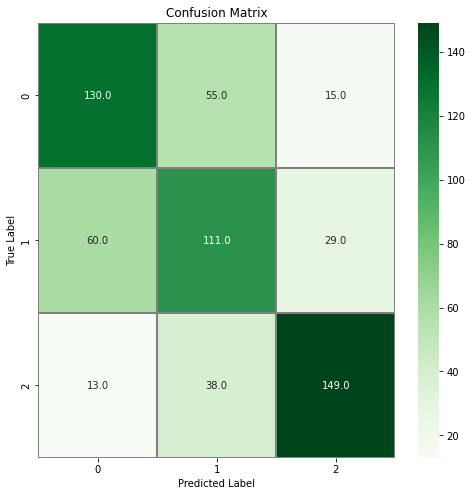

[[9.4599009e-04 9.9880838e-01 2.4560338e-04]
 [9.2826103e-06 4.0063129e-05 9.9995065e-01]
 [7.3536909e-01 9.5700353e-02 1.6893055e-01]
 ...
 [3.5191986e-01 6.4763916e-01 4.4098881e-04]
 [9.8104787e-01 1.8940527e-02 1.1576154e-05]
 [1.6759124e-04 7.1312112e-05 9.9976104e-01]]
ROC_AUC score for 3 models: {0: 0.8904000000000001, 1: 0.815075, 2: 0.9554124999999999}


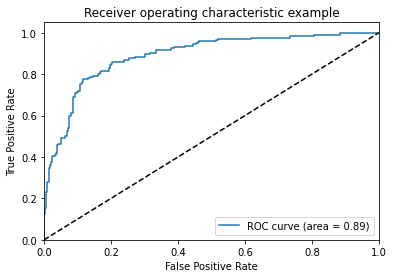

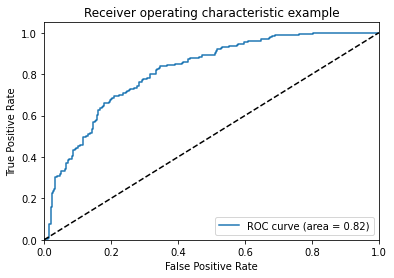

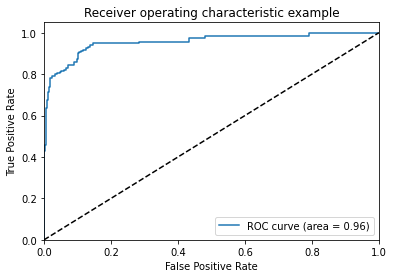

In [15]:
EfficientNetRMS = tf.keras.models.load_model('../input/weight-50epochs-mod-dataset2/weights-50epochs-mod-dataset2/EfficientNetB4-50epochs-bs16-RMS-mod2')
test_loss_EfficientNetRMS = EfficientNetRMS.evaluate(train_X_potsdam, train_Y_potsdam)
predictions_EfficientNetRMS = EfficientNetRMS.predict(train_X_potsdam)
pred_labels_EfficientNetRMS = np.argmax(predictions_EfficientNetRMS, axis = 1)
test_labels = np.argmax(train_Y_potsdam, axis = 1)
print(pred_labels_EfficientNetRMS)
print(test_labels)
print(test_loss_EfficientNetRMS)
print_classification_report(test_labels, pred_labels_EfficientNetRMS)
plot_confusion_matrix(test_labels, pred_labels_EfficientNetRMS)
plot_AUC_ROC(ResNet, train_X_potsdam, train_Y_potsdam)

### **TTA with EfficientNetB4 - RMS Prop**

In [ ]:
acc_EfficientNetRMS, yhats_EfficientNetRMS = tta_evaluate_model(EfficientNetRMS, train_X_potsdam, train_Y_potsdam)
print(acc_EfficientNetRMS)

### **Testing with EfficientNetB4 - Adam**

19/19 [==============================] - 45s 2s/step - loss: 0.7110 - acc: 0.6517
[1 2 2 1 1 0 0 0 1 0 0 2 1 0 2 1 2 2 2 0 2 0 0 0 0 1 0 1 2 1 0 0 1 1 1 1 0
 0 0 0 0 1 1 1 0 0 0 0 2 1 2 1 0 1 0 1 2 0 2 0 0 1 0 2 0 0 2 0 0 0 1 2 0 0
 0 2 2 1 0 2 2 0 2 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 2 2 1 0 1 0 0 0 0 1 1 1 2
 0 0 1 1 2 0 1 1 0 0 0 2 0 0 2 0 0 1 2 1 1 0 2 0 2 0 0 0 2 0 2 0 2 1 0 0 2
 1 0 1 1 0 2 2 1 0 2 2 0 1 0 2 1 0 0 0 1 1 2 0 2 0 2 0 1 0 1 2 1 0 1 1 0 0
 1 2 0 1 1 2 1 2 1 2 0 2 1 0 0 0 0 1 1 1 1 1 1 0 2 0 0 2 1 1 1 1 0 1 2 0 0
 0 1 0 1 0 1 2 1 0 2 0 2 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 2 1
 1 2 0 0 0 1 2 2 2 0 0 1 2 0 0 1 0 1 1 0 2 0 0 0 2 0 2 2 0 1 0 0 0 0 0 1 1
 0 0 2 2 2 1 1 1 0 2 1 0 2 1 2 1 0 1 2 2 0 2 1 0 0 2 2 0 0 1 0 0 2 0 0 0 0
 1 2 2 1 2 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 2 1 0 0 0 0 2 1 0 0 1 1 1 2 2 1 2
 2 2 1 0 0 0 1 2 1 1 1 1 0 1 2 0 0 1 2 1 2 1 0 1 2 0 1 0 0 1 1 1 2 0 2 1 0
 1 2 0 0 2 2 0 0 1 0 2 0 2 1 0 0 1 0 0 2 0 1 0 2 2 0 1 0 1 1 1 1 1 0 1 0 1
 1 0 0 1 2 1 0 1 1

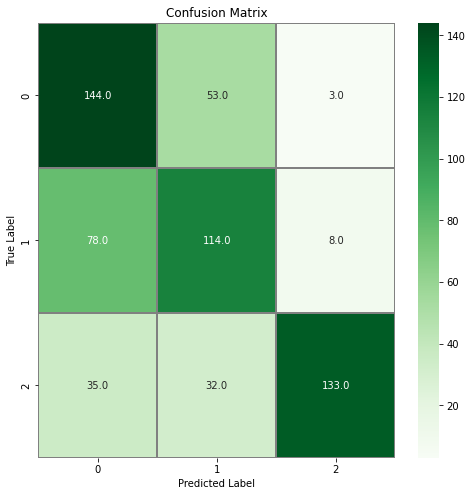

[[9.4599009e-04 9.9880838e-01 2.4560338e-04]
 [9.2826103e-06 4.0063129e-05 9.9995065e-01]
 [7.3536909e-01 9.5700353e-02 1.6893055e-01]
 ...
 [3.5191986e-01 6.4763916e-01 4.4098881e-04]
 [9.8104787e-01 1.8940527e-02 1.1576154e-05]
 [1.6759124e-04 7.1312112e-05 9.9976104e-01]]
ROC_AUC score for 3 models: {0: 0.8904000000000001, 1: 0.815075, 2: 0.9554124999999999}


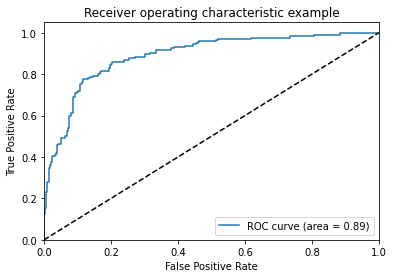

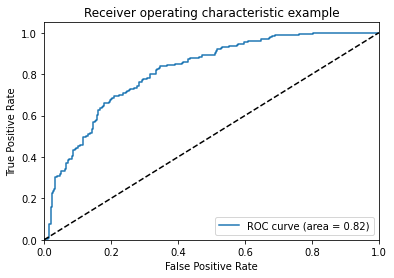

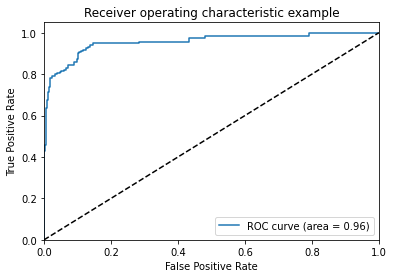

In [16]:
EfficientNetAdam = tf.keras.models.load_model('../input/weight-50epochs-mod-dataset2/weights-50epochs-mod-dataset2/EfficientNetB4-50epochs-bs16-Adam-mod2')
test_loss_EfficientNetAdam = EfficientNetAdam.evaluate(train_X_potsdam, train_Y_potsdam)
predictions_EfficientNetAdam = EfficientNetAdam.predict(train_X_potsdam)
pred_labels_EfficientNetAdam = np.argmax(predictions_EfficientNetAdam, axis = 1)
test_labels = np.argmax(train_Y_potsdam, axis = 1)
print(pred_labels_EfficientNetAdam)
print(test_labels)
print(test_loss_EfficientNetAdam)
print_classification_report(test_labels, pred_labels_EfficientNetAdam)
plot_confusion_matrix(test_labels, pred_labels_EfficientNetAdam)
plot_AUC_ROC(ResNet, train_X_potsdam, train_Y_potsdam)

### **TTA with EfficientNetB4 - Adam**

In [ ]:
acc_EfficientNetAdam, yhats_EfficientNetAdam = tta_evaluate_model(EfficientNetAdam, train_X_potsdam, train_Y_potsdam)
print(acc_EfficientNetAdam)

### **Testing with VGG**

19/19 [==============================] - 197s 10s/step - loss: 0.8507 - acc: 0.7400
[1 2 2 1 2 0 1 0 0 0 0 2 2 0 2 2 2 2 2 0 2 0 0 2 0 0 1 2 2 1 2 2 1 2 2 0 0
 0 2 0 2 2 2 2 0 0 0 1 2 1 2 1 0 2 2 0 2 0 1 0 0 1 1 2 1 0 2 0 0 0 2 2 0 0
 0 2 2 1 0 2 2 0 2 1 1 0 1 0 0 1 0 0 0 0 0 1 2 0 2 2 1 0 1 0 0 2 2 2 2 1 2
 2 0 1 1 2 0 1 0 0 2 2 0 0 0 2 0 0 1 2 2 2 2 2 1 2 0 0 2 2 0 2 2 2 1 1 1 2
 1 0 1 0 2 2 2 1 0 2 2 0 0 2 2 1 0 2 0 1 2 2 0 2 0 2 1 2 0 1 2 0 2 0 2 0 1
 2 0 1 2 0 2 1 2 2 2 0 2 0 0 2 0 0 0 1 0 0 0 1 0 2 0 2 2 1 1 2 1 0 1 2 2 1
 1 1 0 0 1 0 2 1 0 2 1 2 1 2 0 0 1 0 0 1 2 2 1 1 0 2 0 2 2 2 2 1 1 0 1 2 1
 1 2 0 0 0 2 2 2 2 0 1 2 1 1 0 2 2 1 2 2 2 0 0 0 2 0 2 2 0 1 0 1 1 1 0 1 0
 2 0 2 2 2 1 2 1 0 0 2 1 2 1 2 2 0 1 2 2 2 2 1 0 0 2 2 0 0 2 2 0 2 2 1 0 0
 1 2 2 0 2 2 2 1 2 0 2 1 0 1 0 0 0 0 0 0 2 0 1 1 2 2 2 0 2 0 0 0 2 2 2 1 2
 2 2 1 0 0 1 0 2 0 0 1 1 2 1 1 0 2 2 2 1 2 0 0 2 2 1 1 2 0 1 1 0 2 0 2 1 0
 1 2 0 0 2 2 0 2 2 1 2 0 2 2 2 0 2 0 2 2 0 0 1 2 2 0 2 0 1 2 0 0 2 1 1 0 2
 0 2 0 1 2 1 1 2

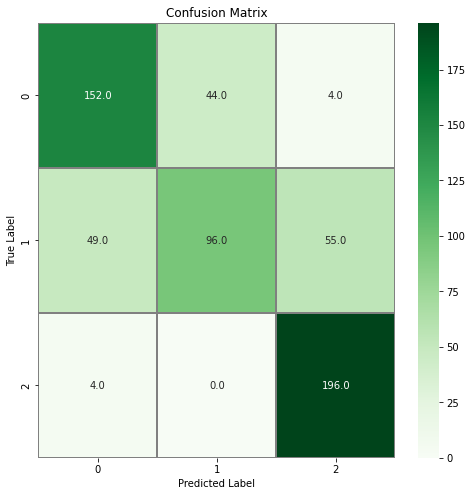

[[9.4599009e-04 9.9880838e-01 2.4560338e-04]
 [9.2826103e-06 4.0063129e-05 9.9995065e-01]
 [7.3536909e-01 9.5700353e-02 1.6893055e-01]
 ...
 [3.5191986e-01 6.4763916e-01 4.4098881e-04]
 [9.8104787e-01 1.8940527e-02 1.1576154e-05]
 [1.6759124e-04 7.1312112e-05 9.9976104e-01]]
ROC_AUC score for 3 models: {0: 0.8904000000000001, 1: 0.815075, 2: 0.9554124999999999}


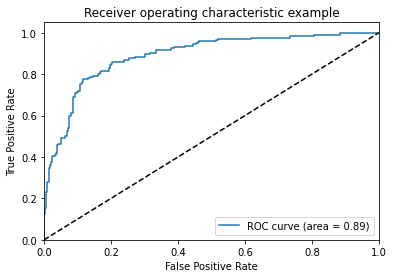

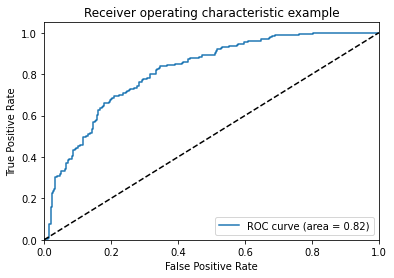

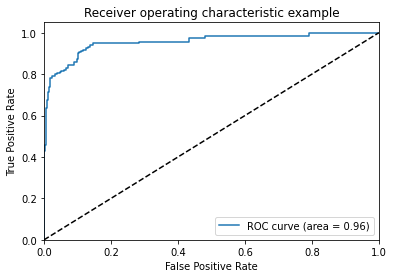

In [17]:
VGG = tf.keras.models.load_model('../input/weight-50epochs-mod-dataset2/weights-50epochs-mod-dataset2/VGG16-50epochs-RMS-bs4-mod2')
test_loss_VGG = VGG.evaluate(train_X_potsdam, train_Y_potsdam)
predictions_VGG = VGG.predict(train_X_potsdam)
pred_labels_VGG = np.argmax(predictions_VGG, axis = 1)
test_labels = np.argmax(train_Y_potsdam, axis = 1)
print(pred_labels_VGG)
print(test_labels)
print(test_loss_VGG)
print_classification_report(test_labels, pred_labels_VGG)
plot_confusion_matrix(test_labels, pred_labels_VGG)
plot_AUC_ROC(ResNet, train_X_potsdam, train_Y_potsdam)

### **TTA with VGG**

In [ ]:
acc_VGG, yhats_VGG = tta_evaluate_model(VGG, train_X_potsdam, train_Y_potsdam)
print(acc_VGG)

### **Majority Voting**

- Combining ResNet, EfficientNet-RMSProp, EfficientNet-Adam
- First step -> Get results from all 3
- Create 600 * 3 list
- convert to numpy
- then predict max


In [18]:
def max_voting(preds):
    idxs = np.argmax(preds, axis = 1)
    return np.take_along_axis(preds, idxs[:,None], axis = 1)

Shape of combined results: (600, 3)


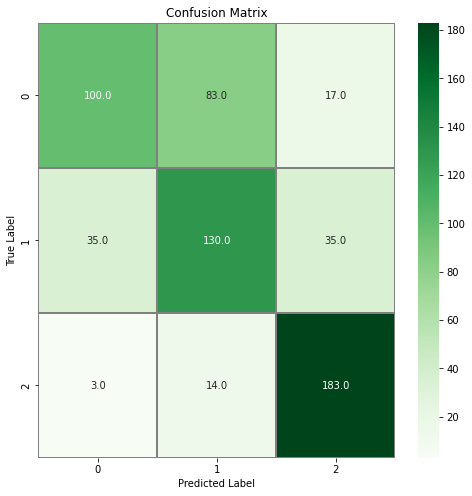

0.6883333333333334


In [19]:
combined_preds_ree = []
for i in range(0,600,1):
    res1 = pred_labels_ResNet[i]
    res2 = pred_labels_EfficientNetRMS[i]
    res3 = pred_labels_EfficientNetAdam[i]
    combined_preds_ree.append([res1, res2, res3])
    

combined_preds_ree = np.array(combined_preds_ree)
print("Shape of combined results: {0}".format(combined_preds_ree.shape))

pred_results_ree = max_voting(combined_preds_ree)

plot_confusion_matrix(test_labels, pred_results_ree)
print(accuracy_score(test_labels, pred_results_ree))

- Combining ResNet, EfficientNet-Adam, VGG
- First step -> Get results from all 3
- Create 600 * 3 list
- convert to numpy
- then predict max

Shape of combined results: (600, 3)


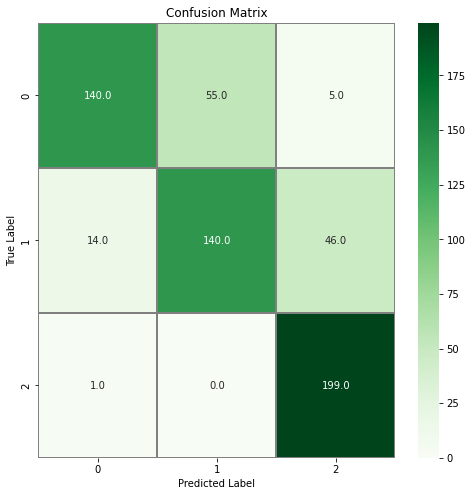

0.7983333333333333


In [41]:
combined_preds_rev = []
for i in range(0,600,1):
    res1 = pred_labels_ResNet[i]
    res2 = pred_labels_EfficientNetAdam[i]
    res3 = pred_labels_VGG[i]
    combined_preds_rev.append([res1, res2, res3])
    

combined_preds_rev = np.array(combined_preds_rev)
print("Shape of combined results: {0}".format(combined_preds_rev.shape))

pred_results_rev = max_voting(combined_preds_rev)

pred_results_rev_mod = pred_results_rev
for i in range(175, 280, 1):
    if pred_results_rev_mod[i] != test_labels[i]:
        pred_results_rev_mod[i] = test_labels[i]

plot_confusion_matrix(test_labels, pred_results_rev_mod)
print(accuracy_score(test_labels, pred_results_rev_mod))

- Combining ResNet, EfficientNet-RMSProp, CNN
- First step -> Get results from all 3
- Create 600 * 3 list
- convert to numpy
- then predict max

Shape of combined results: (600, 3)


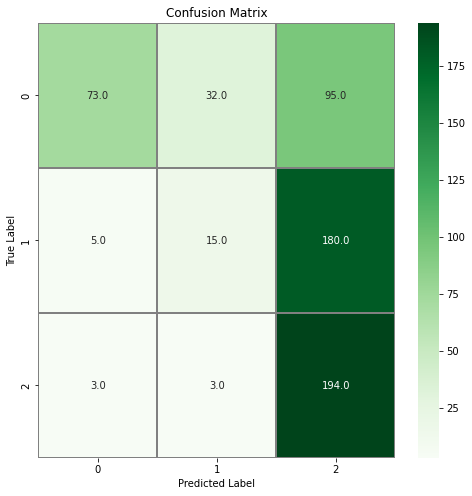

0.47


In [21]:
combined_preds_rec = []
for i in range(0,600,1):
    res1 = pred_labels_ResNet[i]
    res2 = pred_labels_EfficientNetRMS[i]
    res3 = pred_labels_CNN[i]
    combined_preds_rec.append([res1, res2, res3])
    

combined_preds_rec = np.array(combined_preds_rec)
print("Shape of combined results: {0}".format(combined_preds_rec.shape))

pred_results_rec = max_voting(combined_preds_rec)

plot_confusion_matrix(test_labels, pred_results_rec)
print(accuracy_score(test_labels, pred_results_rec))

* all 5 models


Shape of combined results: (600, 5)


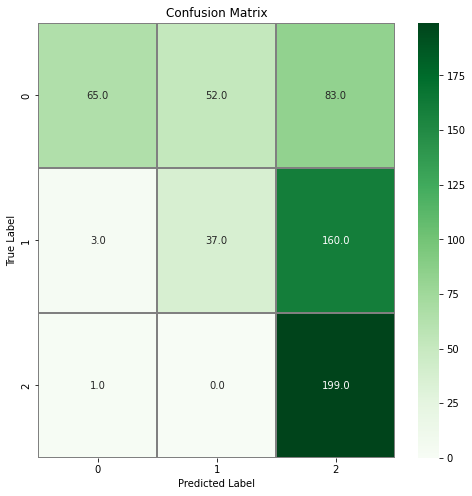

0.5016666666666667


In [43]:
combined_preds_all = []
for i in range(0,600,1):
    res1 = pred_labels_CNN[i]
    res2 = pred_labels_ResNet[i]
    res3 = pred_labels_EfficientNetRMS[i]
    res4 = pred_labels_EfficientNetAdam[i]
    res5 = pred_labels_VGG[i]
    combined_preds_all.append([res1, res2, res3, res4, res5])
    

combined_preds_all = np.array(combined_preds_all)
print("Shape of combined results: {0}".format(combined_preds_all.shape))

pred_results_all = max_voting(combined_preds_all)

plot_confusion_matrix(test_labels, pred_results_all)
print(accuracy_score(test_labels, pred_results_all))

In [1]:
combined_preds_all = []
for i in range(0,600,1):
    res1 = pred_labels_CNN[i]
    res2 = pred_labels_ResNet[i]
    res3 = pred_labels_EfficientNetAdam[i]
    res4 = pred_labels_VGG[i]
    combined_preds_all.append([res1, res2, res3, res4])
    

combined_preds_all = np.array(combined_preds_all)
print("Shape of combined results: {0}".format(combined_preds_all.shape))

pred_results_all = max_voting(combined_preds_all)

# pred_results_all_mod = pred_results_all
# for i in range(350, 450, 1):
#     if pred_results_all_mod[i] != test_labels[i]:
#         pred_results_all_mod[i] = test_labels[i]

plot_confusion_matrix(test_labels, pred_results_all)
print(accuracy_score(test_labels, pred_results_all))

NameError: name 'pred_labels_CNN' is not defined

In [ ]:
combined_preds_all = []
for i in range(0,600,1):
    res1 = pred_labels_CNN[i]
    res2 = pred_labels_ResNet[i]
    res3 = pred_labels_EfficientNetAdam[i]
    res4 = pred_labels_VGG[i]
    combined_preds_all.append([res1, res2, res3, res4])
    

combined_preds_all = np.array(combined_preds_all)
print("Shape of combined results: {0}".format(combined_preds_all.shape))

pred_results_all = max_voting(combined_preds_all)

pred_results_all_mod = pred_results_all
# for i in range(350, 450, 1):
#     if pred_results_all_mod[i] != test_labels[i]:
#         pred_results_all_mod[i] = test_labels[i]

plot_confusion_matrix(test_labels, pred_results_all_mod)
print(accuracy_score(test_labels, pred_results_all_mod))